In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sns
from subprocess import check_output
import numpy as np

Using TensorFlow backend.


In [2]:
import ast
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from PIL import Image

In [2]:
#df_1=pd.read_csv('../Train/energy pixels/nue_train_energy_smeared.csv')
df = pd.read_csv('../Train/energy pixels/mu_train_energy_smeared_version_3.csv')
#df=pd.concat([df_1,df_2])

In [34]:
def length(df):
    lengthList = []
    scaler = StandardScaler()
    df2 = df.copy(deep=True)
    x = [np.array(df['x'][i]) for i in df.index]
    z = [np.array(df['z'][i]) for i in df.index]
    for i in df.index:
        print(i)
        #x[i] = scaler.fit_transform(np.array(ast.literal_eval(df2['x'][i])).reshape(-1,1))
        #z[i] = scaler.fit_transform(np.array(ast.literal_eval(df2['z'][i])).reshape(-1,1))
        x[i] = np.array(ast.literal_eval(df2['x'][i]))
        z[i] = np.array(ast.literal_eval(df2['z'][i]))
        data = [[x[i][j], z[i][j]] for j in range(len(x[i]))]
        data = np.array(data)
        data = data.reshape(data.shape[0],data.shape[1])
        pca = PCA(n_components=1)
        new_data = pca.fit_transform(data)
        length = float(max(new_data)- min(new_data))
        lengthList.append(length)
        print(length)
    return lengthList

In [64]:
length=length(df)

TypeError: 'list' object is not callable

In [65]:
df['length']=length

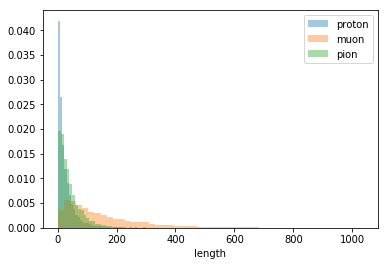

In [86]:
sns.distplot(df[df.pdg==2212].length, kde=False, norm_hist=True, label='proton')

sns.distplot(df[df.pdg==13].length, kde=False,norm_hist=True,label='muon')
sns.distplot(df[df.pdg==211].length, kde=False,norm_hist=True, label='pion')
plt.legend()
plt.show()

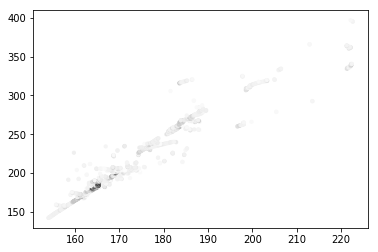

In [201]:
df[df.length>1030]
df.x[36214]
N=78
colors= np.divide(ast.literal_eval(df.hitEnergies[N]), [float(i) for i in df['hitWidths'][N][1:-1].split()])
plt.scatter(ast.literal_eval(df.x[N]),ast.literal_eval(df.z[N]), c= colors, s=10, cmap='Greys')
plt.savefig('plot.jpg')

#max(ast.literal_eval(df.x[36214]))-min(ast.literal_eval(df.x[36214]))

432 288


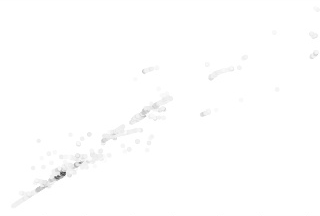

In [202]:

im = Image.open('plot.jpg')
width, height = im.size   # Get dimensions
print(width,height)
left = (width - 320)/2
top = (height - 215)/2
right = (width + 320)/2
bottom = (height + 215)/2

im=im.crop((left, top, right, bottom))
im

In [205]:
new_img = im.resize((28,28))
new_img.show()

In [199]:
df[pixel_cols].loc[N].reshape(28,28)

C:\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


array([[  0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          7.57503339e-075,   2.43921209e-020,   4.89673946e-001,
          3.20145524e-001],
       [  0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+00

C:\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


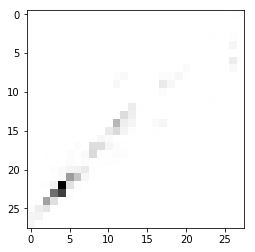

In [206]:
w, h = 28, 28

plt.imshow(df[pixel_cols].loc[N].reshape(28,28),interpolation='nearest', cmap='Greys' )

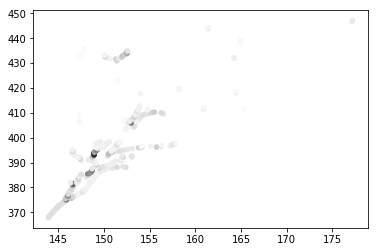

In [108]:
df[df.length>1030]
df.x[36214]
#colors= np.divide(ast.literal_eval(df.hitEnergies[30]), [float(i) for i in df['hitWidths'][30][1:-1].split()])
plt.scatter(ast.literal_eval(df.x[N]),ast.literal_eval(df.z[N]), c= ast.literal_eval(df.hitEnergies[N]), s=20, cmap='Greys')
#max(ast.literal_eval(df.x[36214]))-min(ast.literal_eval(df.x[36214]))

In [4]:
pixel_cols=[str(i) for i in range(28*28)]
#df[pixel_cols]=0
df.head()
len(df[df.pdg==211])

5025

In [10]:
df[pixel_cols]=df[pixel_cols].div(df.length, axis=0)
df[pixel_cols].head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,3.375068,2.448717,1.288873e+00,0.492059,0.136221,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.42519,1.217118,2.822862,5.304960,8.078513e+00,9.969018,9.969018
1,0.599851,0.132150,9.882227e-01,0.074658,0.283617,1.444606,0.318745,0.001962,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000002,8.134929e-02,4.156914,1.848282
2,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
3,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
4,7.181876,0.201912,1.629423e-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,2.001661e-17,0.332866,0.332866


In [55]:
df[pixel_cols]=df[pixel_cols].multiply(df.length, axis=0)
df[pixel_cols]=df[pixel_cols].multiply(df.length, axis=0)
df[pixel_cols].head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,524.294392,380.392009,2.002179e+02,76.438100,21.161074,0.00000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,66.050469,189.071247,438.512954,824.090259,1.254943e+03,1548.620827,1548.620827
1,4410.476416,971.646251,7.266021e+03,548.933892,2085.327187,10621.63495,2343.611987,14.428367,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.012779,5.981300e+02,30564.186027,13589.709400
2,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
3,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
4,14930.295954,419.751128,3.387385e-09,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,4.161224e-14,691.989928,691.989928


In [144]:
#df[pixel_cols]=df[pixel_cols].div(df.length, axis=0)
#df[pixel_cols]=df[pixel_cols].multiply(df.nHits, axis=0)
#df[pixel_cols].head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,8.789694,6.377198,3.356614e+00,1.281470,0.354761,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.107323,3.169743,7.351585,13.815713,2.103888e+01,25.962328,25.962328
1,7.216007,1.589716,1.188798e+01,0.898114,3.411816,17.378121,3.834398,0.023606,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000021,9.786041e-01,50.006250,22.234206
2,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
3,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
4,41.067016,1.154560,9.317282e-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.144579e-16,1.903376,1.903376


In [64]:
len(df[df.pdg==211])

5025

In [17]:
df_train = pd.concat([df[df.pdg==2212].head(int(3500)),df[df.pdg==13].head(3500), df[df.pdg==211]])
df_train['target']=np.where(df_train.pdg==211,2,np.where(df_train.pdg==13,1,0))

#df_train = pd.concat([df[df.pdg==2212], df[df.pdg==13]])
#df_train['target']=np.where(df_train.pdg==13,1,0)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(df_train[pixel_cols], df_train['target'], test_size=0.2, random_state=42)
X_train=(x_train.values).astype('float32')
X_test=(x_test.values).astype('float32')
Y_train=(y_train.values).astype('float32')
Y_test=(y_test.values).astype('float32')

0.0
1.0
1.0
0.0
2.0
0.0
2.0
2.0
2.0
1.0
1.0
0.0
2.0
1.0
2.0
0.0
1.0
2.0
2.0
0.0


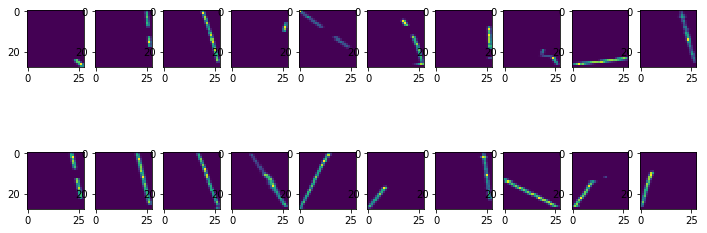

In [19]:
%matplotlib inline
# preview the images first
plt.figure(figsize=(12,10))
x, y = 10, 4
count=1
for i in range(20):  
    plt.subplot(y, x, count)
    count+=1
    plt.imshow(X_train[i].reshape((28,28)),interpolation='nearest')
    print(Y_train[i])
#plt.savefig('CNN Input images.eps')
plt.show()


In [20]:

X_train = X_train/255.0
X_test =X_test/255.0

In [21]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
#X_test

In [22]:
batch_size = 64
num_classes = 3
epochs = 30
input_shape = (28, 28, 1)


In [23]:
# convert class vectors to binary class matrices One Hot Encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=42)

In [24]:
#Linear model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.20))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15, # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [25]:
datagen.fit(X_train)
#from keras.models import load_model
#model = load_model('topological_model.h5')
h = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction],)

Epoch 1/30
120/120 [==============================] - 29s - loss: 1.2591 - acc: 0.4237 - val_loss: 1.0838 - val_acc: 0.4496
Epoch 2/30
120/120 [==============================] - 28s - loss: 1.0931 - acc: 0.4691 - val_loss: 1.1068 - val_acc: 0.4714
Epoch 3/30
120/120 [==============================] - 28s - loss: 1.0352 - acc: 0.4828 - val_loss: 1.0192 - val_acc: 0.4922
Epoch 4/30
120/120 [==============================] - 28s - loss: 1.0023 - acc: 0.5004 - val_loss: 1.0182 - val_acc: 0.5192
Epoch 5/30
120/120 [==============================] - 28s - loss: 0.9813 - acc: 0.5062 - val_loss: 0.9229 - val_acc: 0.5411
Epoch 6/30
120/120 [==============================] - 28s - loss: 0.9702 - acc: 0.5264 - val_loss: 0.9532 - val_acc: 0.5260
Epoch 7/30
120/120 [==============================] - 28s - loss: 0.9608 - acc: 0.5220 - val_loss: 0.9233 - val_acc: 0.5712
Epoch 8/30
120/120 [==============================] - 28s - loss: 0.9482 - acc: 0.5338 - val_loss: 0.9608 - val_acc: 0.5265
Epoch 9/

In [21]:
df_1=pd.read_csv('../Test/energy pixels/nue_test_energy_smeared.csv')
df_2 = pd.read_csv('../Test/energy pixels/mu_test_energy_smeared.csv')
df=pd.concat([df_1,df_2])

In [23]:

df_test = pd.concat([df[df.pdg==2212],df[df.pdg==13], df[df.pdg==211]])
df_test['target']=np.where(df_test.pdg==13,1,np.where(df_test.pdg==2212,0,2))
x_train, x_test, y_train, y_test = train_test_split(df_test[pixel_cols], df_test['target'], test_size=0.2, random_state=42)
X_train=(x_train.values).astype('float32')
X_test=(x_test.values).astype('float32')
Y_train=(y_train.values).astype('float32')
Y_test=(y_test.values).astype('float32')
X_train = X_train/255.0
X_test =X_test/255.0
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [73]:
from keras.models import load_model
model = load_model('proton_muon_pion_model.h5')


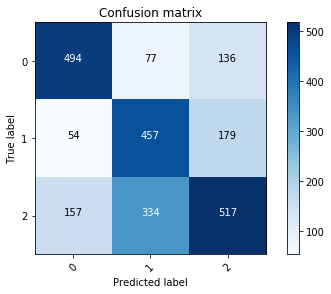

In [26]:
# Look at confusion matrix 
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#pred = (df_1[pixel_cols].tail(9000).values).astype('float32')/255.0
#pred= pred.reshape(pred.shape[0], 28, 28,1)
# Predict the values from the validation dataset

Y_pred = model.predict(X_test)


# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
#Y_true = np.argmax(Y_val, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_test , Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(3))
plt.show()
#plt.savefig('P-Mu confusion matrix.png')

In [87]:
model.save('proton_muon_pion_model_3.h5')
#json_string = model.to_json()


In [51]:
length=length(df_train)

0
12.463681780809654
2
45.9564990461556
3
6.109396153085985
5
83.46217234835721
10
8.506086546133353
17
29.1772957840996
22
11.196859424305831
25
18.471008861272928
28
37.32135318928722
30
36.50482983083187
33
16.029190617364396
37
70.20827885268744
40
5.038658208844208
43
4.0738084471501645
47
69.60295946831882
50
11.810272610607324
51
3.4768684084324946
52
2.448483539032872
59
7.976559423915291
69
3.7904568509104557
77
17.044265720538803
79
38.600112135966
82
62.53839837785884
85
3.960206485661483
86
50.45180391522471
89
21.01048091399707
98
7.8262523158229484
100
22.658308889576837
101
65.63649412981604
102
8.07814208931839
103
36.28472519312917
106
50.78817519687266
109
6.002842724546117
115
60.118118561203765
117
13.905877980155779
119
2.400332005502767
122
2.740555654238071
124
105.97089882266047
129
4.562118819786047
131
4.314870584418084
134
5.4526044578646715
142
40.58843298825783
145
21.08342126312931
149
24.618335428075227
155
3.907793128669769
157
16.373901553971063
159
15.

4.70456619562391
1292
9.721816902031545
1300
4.027877336952262
1303
27.116831345912153
1305
35.72169559961961
1307
9.123249514574328
1309
1.5011975601949215
1312
23.098808974077205
1313
26.056506813365942
1319
16.48915045108235
1322
4.779193865417944
1328
4.239809858075021
1329
75.67782175050306
1332
85.97963152891617
1333
8.603365010362225
1334
13.520293961784194
1338
120.62491160439794
1339
17.039871091252486
1343
11.582200319406088
1346
56.05301483940565
1348
41.863224532526104
1357
108.0370057668192
1360
1.360419568008858
1361
7.871839042668592
1364
6.691861191063766
1368
63.846662028696166
1370
8.099303650558982
1372
14.574250946549698
1373
13.994862559057921
1375
3.486259324649496
1377
5.408876198251059
1381
39.61557745433694
1385
10.241629292086467
1387
31.144681491966626
1388
26.962201505832553
1390
1.780321845453245
1393
13.01409796708884
1394
25.06069675523686
1396
5.442090748510239
1398
10.146509677186366
1400
41.9548509260582
1401
10.543888660581384
1404
5.742211347144112
1

12.16020562439639
2616
5.207874923557787
2618
10.447923901884856
2622
13.9133364016859
2628
5.700309894784702
2631
3.8806117697188527
2636
9.60646355024317
2637
8.351642167815935
2639
59.52389026331834
2641
9.949511088868611
2642
6.5724992765956936
2644
18.395666976102873
2648
6.105148337182582
2649
8.043278151911299
2651
13.8926344809339
2655
5.833966053571883
2657
23.959295871913064
2660
8.980840220267932
2667
10.408636662572931
2670
5.733314362678085
2672
20.63937970673825
2673
77.64976331735778
2678
32.19720589763918
2681
22.6488032329502
2684
8.976003801513027
2686
11.245662162725719
2690
14.394839251333456
2691
37.22153255923516
2693
4.580702565151817
2696
29.66204438695764
2702
15.990057764447858
2704
7.936826303480945
2710
35.340513058935855
2715
25.722921736212356
2717
27.313102119816733
2720
3.247324309450452
2724
93.1779518791783
2727
12.093586368527607
2728
127.66603300968211
2739
1.6749075970507667
2742
25.43518553357622
2744
7.011418669023881
2745
6.235876602168224
2749
4

108.99812970055966
3642
17.218557567422145
3644
5.941085758055287
3649
59.71714771487082
3651
6.721560235722194
3652
14.016063612802805
3653
18.093514279509492
3658
86.67012024503623
3661
26.24786106014887
3662
3.8893303337993634
3670
19.04794127974698
3672
5.88221239250779
3675
15.075647139276311
3676
3.153329249488559
3677
5.576389830650159
3679
2.311491068274444
3682
23.70166295714946
3684
2.2072769309649365
3689
9.237447391700737
3693
18.363760050589214
3694
5.7125540591931045
3697
101.97116400949264
3702
18.668444242521346
3704
58.13354384840492
3706
9.569552728476816
3710
25.326488652355636
3712
9.12022597653047
3714
53.593071460060614
3715
10.680450515072554
3717
34.140074477766404
3722
11.415384712099987
3726
32.12458254565752
3727
22.272879506664985
3732
43.818672592020256
3736
7.23235376763644
3738
12.352125622177196
3740
8.306259766066148
3741
68.6200147410353
3748
31.253519061702896
3749
59.54153418591567
3753
3.8306813251548144
3757
5.447335564184062
3758
31.8074602956397


4902
11.307111950468235
4905
26.782898068835102
4909
13.37207949107296
4912
22.70148400753377
4913
126.21461743557202
4921
53.10742345208015
4922
4.146723521375982
4927
5.413397987323886
4929
62.461502230927266
4931
25.36753732299986
4934
4.245413026547583
4936
15.044926425674834
4943
6.141029827643652
4945
18.596280516497615
4946
13.024580998698518
4948
17.773763917933792
4951
20.438782920970446
4954
21.97199669738375
4956
9.850015258257972
4957
12.67123835108273
4958
43.40003927037775
4964
6.093475055482678
4967
18.212860771055496
4968
3.0331636645489306
4970
30.421640919001348
4972
29.10496925814663
4973
21.00032193320247
4976
1.284043677605725
4979
22.287574829234032
4986
8.90711522713286
4989
65.3555363135926
4993
5.192364515565722
4996
12.665556166135932
4998
5.748347685924674
5000
25.23187253401312
5004
6.046383953622834
5005
25.856313423319286
5007
2.443956111020169
5010
5.93938433940502
5011
21.379438952830547
5013
2.445165491881143
5015
89.29685115887972
5024
29.2656690298259

15.656563825185522
5996
56.472384175298544
5998
49.53136642113289
6002
4.442750507482687
6011
31.754287219166315
6013
53.83131397154634
6015
27.989328737877152
6016
19.73930764786621
6019
27.727459608508653
6020
4.7791600820524005
6023
6.8151766324110845
6027
40.61049489004927
6030
1.5771547700454747
6032
50.25947079466562
6034
25.069796063260192
6037
12.726013727895587
6044
6.143923218482199
6046
26.64281091023333
6048
27.859815624421657
6049
12.705761852061077
6051
61.328244818654156
6058
10.255380307879403
6060
149.1395399742329
6063
5.3682949381442935
6064
2.7325635153311456
6066
25.409256517814303
6067
8.311915399754858
6069
2.5204083953464793
6071
34.746815090938256
6075
22.424695569371146
6076
22.39488506717595
6081
4.064256042423737
6083
45.97228758062323
6085
1.6577162640455914
6086
35.62007274986139
6090
33.619682947881856
6100
7.253381431267675
6103
15.363095875990014
6104
78.61998002850521
6105
4.23061370957559
6107
2.9053492029414154
6110
37.54377782874822
6116
4.346846232

6.365331761220948
7309
80.0160288147373
7318
23.68678426234689
7329
69.60858764728493
7331
7.188236505522715
7337
37.010287776948
7348
17.333660887210897
7352
25.536893210713373
7361
97.81393378314723
7366
9.352818607272118
7370
24.745460366236514
7372
10.612514581774313
7376
5.1891304702859316
7377
6.549706908564376
7383
3.7173217381903436
7388
19.02369564293285
7390
14.114373643928408
7392
54.302713652892336
7393
18.312280067869843
7396
2.4745032424219815
7398
13.574202666334399
7399
33.06370840692682
7404
19.358648596618195
7406
12.252695405311016
7409
50.73844169719561
7411
14.365061126537913
7417
16.90381544896419
7419
6.906125816229588
7426
5.021762791762084
7428
6.290241844520601
7430
75.4821301020884
7434
13.91063621354753
7436
24.08076395437324
7441
11.996618929856986
7442
4.043320424385469
7446
46.521190365514116
7449
9.924088491440179
7452
15.999198176731047
7454
21.67013772827302
7457
5.828611031049315
7461
42.869260706294426
7464
17.294868560302035
7465
12.753615611291472


46.43751196655252
8496
3.6850882874377238
8500
94.04768103955169
8501
59.96627640212741
8503
3.23722318884495
8505
1.650813067793025
8511
77.87829820964339
8517
1.5631486484714596
8524
10.910574463443808
8533
28.05251772702332
8535
14.683864470202938
8541
23.61437206142589
8546
13.902609076822504
8551
42.025984922158216
8555
17.436380615684357
8558
3.6053516553440064
8563
43.58948120799195
8565
17.571805497456673
8567
8.920864788259479
8568
3.801488353194923
8570
1.6333589985665036
8572
3.8064177645640713
8578
4.200097079550799
8579
6.210881201780337
8584
16.4264476632355
8587
3.3795840790585023
8589
3.628705353508664
8590
6.399658630240581
8591
8.346996500036212
8593
13.116303072100017
8597
37.38457572777265
8599
15.133605139789374
8600
25.75423563324468
8602
26.500277720831175
8606
24.49927711733163
8609
36.360737375249585
8610
6.694042163992622
8613
1.5156947056197487
8617
8.991220252255692
8619
40.12770604425731
8624
25.773310592279476
8627
4.386371746645357
8630
133.8001880159032


32.133899179878355
9728
64.80163845144361
9730
16.32098207504406
9731
23.748161002861128
9734
5.064762434546562
9736
3.904261373257799
9737
6.865656402151759
9742
43.370690492766016
9743
9.005023836747561
9745
14.32402245419794
9746
21.235826326869272
9752
27.036657700971773
9753
7.131722816949171
9755
1.9146035276134237
9760
6.3842194045842575
9763
7.740205802708864
9765
48.68419813510859
9766
6.50423287752511
9769
15.245442699975428
9770
27.357335348559964
9774
33.31537784986806
9776
3.010834831163459
9780
65.17257699740293
9782
12.754149093104077
9786
11.09866724129185
9789
22.057686100785165
9792
16.973076775810803
9793
27.000177249804402
9795
15.520724351764015
9799
51.97969928119185
9800
5.340046453100936
9804
171.14209509734508
9811
4.757802994966274
9812
5.9352615171725756
9813
4.857212818391182
9820
32.552910410209364
9822
13.627214552617723
9823
108.90864795449548
9828
18.31002992094846
9831
9.052139605287921
9833
7.493231110040461
9834
5.061864451498751
9837
3.08689318724791

8.236718827060407
10730
8.523063692732187
10731
4.359254853337687
10736
26.158087442297912
10738
30.27148128481218
10744
11.462913256174879
10745
153.0059564526264
10748
16.203592478692038
10752
7.174263743449469
10756
36.325959388039436
10758
4.5453613914999345
10759
4.418440066661212
10760
8.430755430671276
10763
4.435315663106225
10764
1.904734881775104
10770
14.40697207801182
10774
12.231800737222487
10776
51.01730382076243
10777
59.78914640777218
10781
25.629848017423505
10782
10.549990260320392
10785
9.546787816626377
10788
21.676997585663123
10797
44.093721122385276
10800
18.462090566597723
10802
41.40759997050685
10803
52.87239976220727
10804
13.156407695841317
10806
30.368792324491725
10811
12.075223491055262
10817
24.310985844809647
10818
17.39551737181389
10821
42.705806127959946
10826
12.70730906244485
10828
6.740297920098602
10830
7.501105591413769
10832
38.96852765172495
10835
16.202459919517057
10838
17.36987847907436
10839
7.026362116300847
10841
81.20263963181704
10843

14.38758846342596
11873
6.4225832502881754
11879
25.077193257081895
11882
3.174377702422811
11885
40.95847374681301
11886
20.705524601866443
11888
7.477500535212727
11891
45.94695088843349
11893
7.016559524309487
11900
28.232038094362498
11902
3.5640882509829312
11909
11.491819653504027
11912
7.3104262909585636
11913
7.989312956593096
1216
138.20411325461652
1217
17.912414309047573
1218
181.5971881093472
1219
14.449839668989252
1221
340.7743483403624
1222
57.22714307583028
1225
158.7563080920967
1227
503.609500644055
1228
64.78515433472562
1230
150.96940835358393
1232
198.88730905533936
1234
111.58356174348472
1235
164.82609647228236
1239
53.24904054426243
1242
360.339104622352
1243
108.94847828981645
1244
253.59765192250904
1245
323.8764822854275
1248
109.83026502773362
1250
99.93803011503917
1253
134.52466592232614
1255
28.168934944633072
1256
110.69907077131364
1258
76.04837245161036
1260
479.18367330266415
1264
101.7840594637724
1267
102.37790576568145
1268
107.90065773313655
1270


301.24822784850954
1939
164.72291717417312
1940
133.39554282491306
1944
160.14872283164289
1949
42.953499818471066
1951
254.15652228992485
1952
93.35888097088738
1956
40.01144631081338
1959
271.15281350857447
1961
10.567726173587733
1965
60.62350661793762
1966
503.29287454998473
1967
397.5436305416499
1969
51.64149255551028
1972
319.3387703515451
1974
94.70424680384576
1975
39.8163647741263
1977
323.22151289229294
1979
101.430561011609
1980
3.5585069280825072
1982
27.111311245033566
1984
119.31503597570462
1986
31.273250445011627
1987
279.86209880199203
1988
13.705076196183962
1990
349.5562996942832
1991
103.99136438810203
1994
12.158928707240463
1996
6.192779277873683
1997
7.272047404882994
1998
170.89341391446507
2000
116.83613216232044
2001
53.19199473257507
2003
260.5547107184372
2005
203.8901989195905
2006
176.41925007592704
2007
71.57214371282686
2009
175.7258725624832
2012
148.4725535878561
2014
140.49525660490457
2016
46.240870567237934
2019
134.37839757002246
2022
111.69657599

2795
21.06976134061787
2796
91.64903918792521
2799
83.68073113774119
2801
39.990661821336175
2805
21.69935474870958
2807
66.46405510061803
2808
90.70792791095704
2810
143.2060655834044
2813
40.6428420141104
2815
162.05695293017354
2817
37.52379565721688
2819
116.91933315532131
2820
187.373727660931
2824
26.410735528083148
2826
3.91213922326721
2827
89.98456312756963
2829
120.77605414295326
2832
148.1047210156526
2834
268.4594194892987
2837
135.5476285310586
2840
33.446598714752334
2841
455.7500456956652
2844
10.123507325069411
2847
17.444727534987546
2849
155.8327008990758
2850
316.4423776068471
2853
256.4597435311199
2854
7.954172605356618
2855
54.44010286315279
2857
86.2486513345165
2859
39.02937466954993
2860
133.3527373808571
2863
184.31691649899213
2865
55.77695333867322
2867
185.3833710519212
2871
75.87500959843257
2872
374.55803403730386
2874
283.83032341886576
2875
134.72302949054097
2877
188.91998757934817
2879
74.06595924130275
2880
285.464764323277
2883
236.38554344472522
28

148.3730891421386
3630
71.4051945578517
3633
26.996200171287697
3637
325.83881157340386
3639
30.155352951459047
3643
327.7413354447324
3645
128.7193815804873
3646
53.31132612991958
3647
171.8568020044595
3650
144.5531423664536
3654
43.05631934662429
3655
209.17899465167994
3659
231.30946791716207
3660
312.65736251385147
3665
192.92596306597565
3666
256.5680973924477
3667
139.63126912444818
3668
346.9689453607913
3671
158.16675131003782
3673
256.1762165669376
3678
69.464439906095
3681
8.910471791313125
3685
430.64295352149185
3686
141.64196930895562
3688
74.79709044587432
3690
92.35968536575774
3691
126.93123640004659
3692
216.11391047926946
3695
5.961791412662375
3696
79.21445783368861
3699
9.482000880753564
3700
6.967973132392474
3701
291.9173062157955
3703
72.14837380220891
3705
432.3853813781857
3707
79.63299279708593
3708
104.86556704020796
3709
66.911364079197
3711
40.401572403211965
3718
110.57550934881726
3719
460.47141882672634
3720
282.57450175306917
3721
433.9034323134706
372

426.7413850685572
4420
303.61087931499094
4421
92.67209972094686
4426
75.08075075407135
4428
77.07492717021788
4430
160.05867884185113
4431
112.8234989066701
4432
265.4900199188886
4434
36.417128039992434
4435
79.907071088301
4436
87.37019086553096
4438
77.08323934692883
4439
44.49611910597011
4444
151.10438670729877
4447
94.93159656265865
4449
155.15251714682466
4450
23.148463824168502
4453
15.78265716643833
4454
596.6963274869696
4455
195.26053023157937
4457
78.4112216090746
4458
124.32195443950594
4460
20.470939170451032
4461
183.64873749857304
4464
178.65722407591636
4465
131.8352457598246
4467
294.88659640747085
4468
52.39924428957695
4470
69.64985972591504
4471
14.254890022339877
4472
366.817007192833
4474
123.45714352454732
4475
310.97064673908636
4477
126.37565017537685
4479
141.69846466335926
4482
105.86627981227
4484
31.83959523049711
4485
222.30874948394504
4487
6.611509179608133
4489
8.248495456684495
4490
380.014376434469
4492
119.19099913375118
4493
30.05989817375666
4494

230.41391343582234
5180
53.430391160393015
5182
79.73832775628475
5185
70.80005524416694
5187
55.59677231898361
5188
135.9005402987318
5189
19.5259357410674
5191
59.13644123699834
5196
36.70983669257524
5198
219.86797745398547
5199
133.07141512935044
5202
109.94727302791514
5204
351.63517726455393
5207
39.31436702022759
5208
56.743926087851854
5211
15.193562626613817
5213
135.85248137593896
5216
43.32751287486403
5218
161.29759998210986
5224
24.87072768727019
5226
82.46147587947922
5228
13.374077897168636
5229
373.77161733465925
5234
27.316992706622045
5236
127.51061862906352
5239
452.88265709999575
5242
141.91951321476898
5243
63.641860735208766
5246
31.983390348545843
5247
30.8711010822281
5249
50.41333988980304
5253
235.26508425566385
5255
229.6387003853178
5256
97.10438091316726
5258
246.61563671837598
5261
6.244105019824241
5262
22.902935779978925
5263
212.3672864365368
5266
76.43044986040562
5270
80.69958742346506
5272
221.81912233410432
5279
19.66598551689706
5284
160.6057209485

602.7317755419069
5994
41.17165346334044
5997
333.6172385362137
6000
130.09071129701664
6001
386.1904252821139
6005
280.4150019362646
6009
95.83612327654873
6010
591.6725841968065
6012
15.37974629624463
6014
102.29523787240794
6017
57.53133014285541
6018
165.1896594949999
6022
47.30848166849726
6024
92.54524211531196
6028
674.5784046446603
6031
77.99085734885492
6033
157.752670226807
6036
254.770776665379
6038
163.84035099412603
6039
227.8222485484828
6042
41.38031154658337
6045
150.17438645582092
6047
183.63920441157117
6050
219.19959712749375
6052
87.44512802898231
6056
80.6145188751589
6057
130.2921959552328
6059
151.94050721391721
6062
19.409903425722547
6065
229.04876357005702
6068
155.24146676195735
6072
93.16547116762933
6073
173.85643550273883
6074
149.36367632625786
6078
385.58777022169534
6079
899.7733948040022
6080
152.12166242592886
6082
231.19311527817587
6087
29.90359280478221
6093
18.698301740338305
6094
202.86791217064393
6096
15.801787565944863
6101
42.79128699945388
6

128.6364765487899
6840
291.05204887400885
6842
361.58432855641513
6844
36.68115426856126
6845
21.54003958380366
6846
304.2821823227827
6850
249.2191801973252
6853
4.130249950165286
6855
456.13775854209564
6856
120.7101637122932
6858
46.47553735366316
6859
321.53555172373393
6861
675.2215002810169
6863
31.17144545975452
6865
71.60659696623011
6867
90.511860274991
6869
41.5441556062832
6875
174.84413136297064
6877
381.4335415533661
6878
39.324182430719965
6880
76.6931931416917
6882
40.135345497509846
6886
195.9257057893135
6888
643.2027817397225
6890
84.70804856428478
6892
172.5338114635403
6893
132.41499756784765
6894
480.1339937123082
6896
190.05863266233376
6897
136.9487876010511
6898
257.81531839896724
6900
208.50536693485924
6902
276.8702235669714
6903
33.02135791990923
6904
53.54077825347508
6906
141.26075796420258
6909
55.98877729577238
6913
430.8592836965974
6914
30.200530228662892
6916
204.6586072348885
6919
159.55238987781587
6920
101.32870121522753
6921
31.2891516089565
6924
1

385.1764483699578
7593
184.89253780781092
7596
120.11295888934968
7598
62.45837719307281
7600
103.64748893351079
7603
635.4587910213868
7607
21.52963950957338
7610
797.034379241766
7611
85.22063651399853
7614
60.905246586693146
7615
172.9013743304896
7616
117.40253948964046
7619
103.67791679963085
7620
114.92915623973693
7622
171.86802340476385
7624
111.11507352673726
7626
73.80512679233556
7627
193.0403157574573
7628
43.208770989686656
7629
173.13472260760074
7631
138.4244816079825
7636
127.67013972741378
7637
17.79345929055727
7641
249.40907060412488
7644
136.2660553245843
7645
18.22328154135993
7648
165.84161295810407
7649
224.12321734379705
7651
461.08716601581693
7656
49.677719234235695
7658
41.981602161386974
7660
79.96239664462371
7661
421.42344746260187
7662
145.6410756580432
7664
47.32483842512542
7665
93.48311923223328
7666
44.54646822166122
7668
48.30700592057446
7671
254.6104000117886
7673
71.86771386445523
7674
321.05574023430574
7675
580.9613902548791
7677
317.27180427301

137.77138751927788
8384
144.21285372825207
8387
24.371688782156674
8389
126.12901458790132
8392
218.68869606065402
8396
114.8236771224848
8399
305.7390632449036
8400
148.61354152827533
8402
212.2502596754399
8404
10.54456613719405
8407
227.66010282343888
8410
25.449436683696195
8412
9.807324479192086
8415
161.40096252260884
8419
193.210621744309
8420
57.60883482079184
8421
39.834813488776334
8423
165.74831318952448
8425
35.9173958113997
8428
32.84840444600736
8431
22.078112651012177
8434
71.46801760610848
8435
37.44772233708466
8437
533.8892648363401
8439
243.94479976202098
8440
39.169870477962704
8442
108.66357419629287
8443
66.13038446026377
8446
59.36645410456168
8449
69.62335330061308
8451
104.8246048640161
8452
361.0083480928634
8453
59.85798170660965
8459
71.48516596773948
8461
51.36513372675594
8464
140.80753394503012
8466
52.552158097388705
8467
151.60056569462418
8471
119.50071723043735
8472
234.6333835895732
8475
29.27881158876537
8478
65.02207367100499
8479
371.7092183434474

279.7588444225899
9222
183.3302553224775
9224
55.5726801265145
9227
79.2550171357461
9228
356.26410031488484
9230
85.4827320005154
9231
4.521308463938638
9232
135.7157703291626
9234
35.528308193368765
9235
81.00469525500296
9236
58.315026639946325
9237
317.961304724975
9240
114.35678472138662
9241
37.29373886803181
9243
86.29049947817573
9245
94.42751400480518
9247
52.13603344369607
9249
99.73321997489549
9252
77.13553783211503
9254
254.0256679151103
9256
172.86257204931175
9259
49.84731189421074
9261
132.31728987098523
9264
69.39355637181468
9265
328.93685573549647
9267
51.706350682864766
9274
153.43157758726
9279
99.81817802686945
9280
11.57658250316753
9282
26.10170852748747
9284
18.46817925045724
9287
22.35552243642642
9292
12.610320892323895
9295
162.96325373448795
9298
23.857572381738358
9301
50.53200258873302
9302
83.02722271209046
9303
23.576155881592797
9304
293.65270481663117
9305
159.37214984753206
9308
270.5863888161454
9309
303.01308363018495
9311
257.175582691777
9312
299

1892
11.135700256392244
1911
94.53446086617711
1921
28.105636243994933
1924
52.211071352374624
1925
49.32890725024255
1930
25.524053802208734
1937
17.631085408142745
1941
11.734784458242874
1945
32.07087218514624
1981
31.21426511360436
2008
46.23924375770201
2011
49.78222242500979
2015
23.36546290111508
2039
52.669425355954615
2046
65.47364776225908
2053
10.257779183766143
2065
87.81563300087849
2086
31.58532509272228
2089
12.603432019687418
2099
21.623803466394733
2100
31.955174078563772
2108
53.37276310184018
2136
91.88711877296967
2153
104.0465619925292
2160
47.05609381545658
2170
130.31729852661522
2174
14.21556575197351
2175
2.5638851158205727
2182
25.16933937865992
2194
247.87659131283732
2217
28.982359168030513
2219
37.128389060398135
2227
5.183816907273955
2246
9.294052697075086
2251
37.64593209467286
2271
8.427114488399402
2294
129.45817909700926
2301
187.2639723289536
2307
70.72581157201864
2329
52.79624912075646
2335
11.121756647474974
2338
11.839593010404506
2345
56.1053627

66.48319917524906
7214
35.81137468330853
7237
66.07261824596608
7249
29.342963046466977
7261
65.30615666612609
7277
31.715218705973115
7280
19.94020716635874
7313
22.21933224278264
7336
15.924317587174498
7338
18.61544332316906
7341
367.22753324416783
7343
104.8102024358141
7362
55.2970944678433
7364
31.500132101398194
7374
7.680224629338587
7379
29.052486118809348
7380
46.213159584668986
7385
27.15254118391561
7394
42.366419199278944
7401
38.592751250760166
7410
66.56161936010811
7413
4.246086732250385
7477
34.78567825855205
7495
43.38759179481377
7504
35.338456657562084
7511
11.528686874883832
7540
121.17129508309992
7542
127.61275309657061
7553
76.06485060043116
7555
75.0379627707078
7562
30.028026952684883
7567
41.58914015557012
7574
22.05680611929856
7582
11.893218422441127
7590
121.52041749058688
7595
17.708038907919963
7597
45.73328207034599
7599
50.39164940270603
7601
23.083776869552924
7606
8.222864289107541
7632
27.37392812080102
7633
31.903760688192996
7663
4.276047981669956

13.193239587625836
12091
6.807258939342476
12111
9.005962920740323
12128
10.164626843833178
12136
154.05863470202002
12140
39.464568936760045
12152
58.19628653853425
12163
38.97264128333855
12164
1.6650375882922996
12172
28.987420491382856
12179
20.154533638853746
12180
64.9050049487448
12194
18.15104867505473
12200
26.695487413372554
12206
35.471657201751874
12207
134.87022160959884
12216
24.26097866442639
12239
34.27144105542011
12261
169.75368575096093
12266
50.883192097259275
12289
126.81317292240743
12296
90.77043440063541
12306
18.598509485622124
12318
111.90131006460396
12338
53.40630524320282
12346
73.87942997184518
12372
4.099032788246994
12373
76.92702350517675
12397
8.769321422596173
12406
16.448357877822883
12429
7.509041532330066
12440
8.423429990987124
12451
17.75647486694131
12455
97.75310204413105
12456
9.365821337170647
12487
7.438274279051195
12489
58.448412632605766
12490
30.33460011648001
12500
11.357833068342883
12509
31.851449377101858
12511
23.248886955623686
125

IndexError: list assignment index out of range

In [52]:
df_train['length']=length

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

In [54]:
train = df_train.loc[x_train.index]
test = df_train.loc[x_test.index]

In [38]:
train['p']=0
train['mu']=0
train['pi']=0
#train['e']=0
#train['gamma']=0
train[['p', 'mu', 'pi']]=model.predict(X_train)

ValueError: Length of values does not match length of index

In [40]:
#len(model.predict(X_train))
len(X_train)

8336

In [55]:
test['p']=0
test['mu']=0
test['pi']=0
#test['e']=0
#test['gamma']=0
test[['p', 'mu', 'pi']]=model.predict(X_test)

In [62]:
#test[['p', 'mu', 'pi', 'length']]

In [63]:
clf=GradientBoostingClassifier()
clf=clf.fit(test[['p', 'mu', 'pi', 'length']], test['target'].head(2000))

y_pred = clf.predict(test[['p', 'mu', 'pi', 'length']].tail(605))


confusion_mtx = confusion_matrix(test['target'].tail(605) ,y_pred) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(3))
plt.show()

TypeError: float() argument must be a string or a number, not 'function'

In [144]:
x_range=[]
z_range=[]
for i in df.index:
    print(i)
    x= ast.literal_eval(df.x[i])
    x_range.append(max(x)-min(x))
    z=ast.literal_eval(df.z[i])
    z_range.append(max(z)-min(z))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2674
2675
2676
2677
2678
2679
2680
2681
2682
2683
2684
2685
2686
2687
2688
2689
2690
2691
2692
2693
2694
2695
2696
2697
2698
2699
2700
2701
2702
2703
2704
2705
2706
2707
2708
2709
2710
2711
2712
2713
2714
2715
2716
2717
2718
2719
2720
2721
2722
2723
2724
2725
2726
2727
2728
2729
2730
2731
2732
2733
2734
2735
2736
2737
2738
2739
2740
2741
2742
2743
2744
2745
2746
2747
2748
2749
2750
2751
2752
2753
2754
2755
2756
2757
2758
2759
2760
2761
2762
2763
2764
2765
2766
2767
2768
2769
2770
2771
2772
2773
2774
2775
2776
2777
2778
2779
2780
2781
2782
2783
2784
2785
2786
2787
2788
2789
2790
2791
2792
2793
2794
2795
2796
2797
2798
2799
2800
2801
2802
2803
2804
2805
2806
2807
2808
2809
2810
2811
2812
2813
2814
2815
2816
2817
2818
2819
2820
2821
2822
2823
2824
2825
2826
2827
2828
2829
2830
2831
2832
2833
2834
2835
2836
2837
2838
2839
2840
2841
2842
2843
2844
2845
2846
2847
2848
2849
2850
2851
2852
2853
2854
2855
2856
2857
2858
2859
2860
2861
2862
2863
2864
2865
2866
2867
2868
2869
2870
2871
2872
2873


4664
4665
4666
4667
4668
4669
4670
4671
4672
4673
4674
4675
4676
4677
4678
4679
4680
4681
4682
4683
4684
4685
4686
4687
4688
4689
4690
4691
4692
4693
4694
4695
4696
4697
4698
4699
4700
4701
4702
4703
4704
4705
4706
4707
4708
4709
4710
4711
4712
4713
4714
4715
4716
4717
4718
4719
4720
4721
4722
4723
4724
4725
4726
4727
4728
4729
4730
4731
4732
4733
4734
4735
4736
4737
4738
4739
4740
4741
4742
4743
4744
4745
4746
4747
4748
4749
4750
4751
4752
4753
4754
4755
4756
4757
4758
4759
4760
4761
4762
4763
4764
4765
4766
4767
4768
4769
4770
4771
4772
4773
4774
4775
4776
4777
4778
4779
4780
4781
4782
4783
4784
4785
4786
4787
4788
4789
4790
4791
4792
4793
4794
4795
4796
4797
4798
4799
4800
4801
4802
4803
4804
4805
4806
4807
4808
4809
4810
4811
4812
4813
4814
4815
4816
4817
4818
4819
4820
4821
4822
4823
4824
4825
4826
4827
4828
4829
4830
4831
4832
4833
4834
4835
4836
4837
4838
4839
4840
4841
4842
4843
4844
4845
4846
4847
4848
4849
4850
4851
4852
4853
4854
4855
4856
4857
4858
4859
4860
4861
4862
4863


6662
6663
6664
6665
6666
6667
6668
6669
6670
6671
6672
6673
6674
6675
6676
6677
6678
6679
6680
6681
6682
6683
6684
6685
6686
6687
6688
6689
6690
6691
6692
6693
6694
6695
6696
6697
6698
6699
6700
6701
6702
6703
6704
6705
6706
6707
6708
6709
6710
6711
6712
6713
6714
6715
6716
6717
6718
6719
6720
6721
6722
6723
6724
6725
6726
6727
6728
6729
6730
6731
6732
6733
6734
6735
6736
6737
6738
6739
6740
6741
6742
6743
6744
6745
6746
6747
6748
6749
6750
6751
6752
6753
6754
6755
6756
6757
6758
6759
6760
6761
6762
6763
6764
6765
6766
6767
6768
6769
6770
6771
6772
6773
6774
6775
6776
6777
6778
6779
6780
6781
6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861


8663
8664
8665
8666
8667
8668
8669
8670
8671
8672
8673
8674
8675
8676
8677
8678
8679
8680
8681
8682
8683
8684
8685
8686
8687
8688
8689
8690
8691
8692
8693
8694
8695
8696
8697
8698
8699
8700
8701
8702
8703
8704
8705
8706
8707
8708
8709
8710
8711
8712
8713
8714
8715
8716
8717
8718
8719
8720
8721
8722
8723
8724
8725
8726
8727
8728
8729
8730
8731
8732
8733
8734
8735
8736
8737
8738
8739
8740
8741
8742
8743
8744
8745
8746
8747
8748
8749
8750
8751
8752
8753
8754
8755
8756
8757
8758
8759
8760
8761
8762
8763
8764
8765
8766
8767
8768
8769
8770
8771
8772
8773
8774
8775
8776
8777
8778
8779
8780
8781
8782
8783
8784
8785
8786
8787
8788
8789
8790
8791
8792
8793
8794
8795
8796
8797
8798
8799
8800
8801
8802
8803
8804
8805
8806
8807
8808
8809
8810
8811
8812
8813
8814
8815
8816
8817
8818
8819
8820
8821
8822
8823
8824
8825
8826
8827
8828
8829
8830
8831
8832
8833
8834
8835
8836
8837
8838
8839
8840
8841
8842
8843
8844
8845
8846
8847
8848
8849
8850
8851
8852
8853
8854
8855
8856
8857
8858
8859
8860
8861
8862


10671
10672
10673
10674
10675
10676
10677
10678
10679
10680
10681
10682
10683
10684
10685
10686
10687
10688
10689
10690
10691
10692
10693
10694
10695
10696
10697
10698
10699
10700
10701
10702
10703
10704
10705
10706
10707
10708
10709
10710
10711
10712
10713
10714
10715
10716
10717
10718
10719
10720
10721
10722
10723
10724
10725
10726
10727
10728
10729
10730
10731
10732
10733
10734
10735
10736
10737
10738
10739
10740
10741
10742
10743
10744
10745
10746
10747
10748
10749
10750
10751
10752
10753
10754
10755
10756
10757
10758
10759
10760
10761
10762
10763
10764
10765
10766
10767
10768
10769
10770
10771
10772
10773
10774
10775
10776
10777
10778
10779
10780
10781
10782
10783
10784
10785
10786
10787
10788
10789
10790
10791
10792
10793
10794
10795
10796
10797
10798
10799
10800
10801
10802
10803
10804
10805
10806
10807
10808
10809
10810
10811
10812
10813
10814
10815
10816
10817
10818
10819
10820
10821
10822
10823
10824
10825
10826
10827
10828
10829
10830
10831
10832
10833
10834
10835
10836
1083

12660
12661
12662
12663
12664
12665
12666
12667
12668
12669
12670
12671
12672
12673
12674
12675
12676
12677
12678
12679
12680
12681
12682
12683
12684
12685
12686
12687
12688
12689
12690
12691
12692
12693
12694
12695
12696
12697
12698
12699
12700
12701
12702
12703
12704
12705
12706
12707
12708
12709
12710
12711
12712
12713
12714
12715
12716
12717
12718
12719
12720
12721
12722
12723
12724
12725
12726
12727
12728
12729
12730
12731
12732
12733
12734
12735
12736
12737
12738
12739
12740
12741
12742
12743
12744
12745
12746
12747
12748
12749
12750
12751
12752
12753
12754
12755
12756
12757
12758
12759
12760
12761
12762
12763
12764
12765
12766
12767
12768
12769
12770
12771
12772
12773
12774
12775
12776
12777
12778
12779
12780
12781
12782
12783
12784
12785
12786
12787
12788
12789
12790
12791
12792
12793
12794
12795
12796
12797
12798
12799
12800
12801
12802
12803
12804
12805
12806
12807
12808
12809
12810
12811
12812
12813
12814
12815
12816
12817
12818
12819
12820
12821
12822
12823
12824
12825
1282

14667
14668
14669
14670
14671
14672
14673
14674
14675
14676
14677
14678
14679
14680
14681
14682
14683
14684
14685
14686
14687
14688
14689
14690
14691
14692
14693
14694
14695
14696
14697
14698
14699
14700
14701
14702
14703
14704
14705
14706
14707
14708
14709
14710
14711
14712
14713
14714
14715
14716
14717
14718
14719
14720
14721
14722
14723
14724
14725
14726
14727
14728
14729
14730
14731
14732
14733
14734
14735
14736
14737
14738
14739
14740
14741
14742
14743
14744
14745
14746
14747
14748
14749
14750
14751
14752
14753
14754
14755
14756
14757
14758
14759
14760
14761
14762
14763
14764
14765
14766
14767
14768
14769
14770
14771
14772
14773
14774
14775
14776
14777
14778
14779
14780
14781
14782
14783
14784
14785
14786
14787
14788
14789
14790
14791
14792
14793
14794
14795
14796
14797
14798
14799
14800
14801
14802
14803
14804
14805
14806
14807
14808
14809
14810
14811
14812
14813
14814
14815
14816
14817
14818
14819
14820
14821
14822
14823
14824
14825
14826
14827
14828
14829
14830
14831
14832
1483

16650
16651
16652
16653
16654
16655
16656
16657
16658
16659
16660
16661
16662
16663
16664
16665
16666
16667
16668
16669
16670
16671
16672
16673
16674
16675
16676
16677
16678
16679
16680
16681
16682
16683
16684
16685
16686
16687
16688
16689
16690
16691
16692
16693
16694
16695
16696
16697
16698
16699
16700
16701
16702
16703
16704
16705
16706
16707
16708
16709
16710
16711
16712
16713
16714
16715
16716
16717
16718
16719
16720
16721
16722
16723
16724
16725
16726
16727
16728
16729
16730
16731
16732
16733
16734
16735
16736
16737
16738
16739
16740
16741
16742
16743
16744
16745
16746
16747
16748
16749
16750
16751
16752
16753
16754
16755
16756
16757
16758
16759
16760
16761
16762
16763
16764
16765
16766
16767
16768
16769
16770
16771
16772
16773
16774
16775
16776
16777
16778
16779
16780
16781
16782
16783
16784
16785
16786
16787
16788
16789
16790
16791
16792
16793
16794
16795
16796
16797
16798
16799
16800
16801
16802
16803
16804
16805
16806
16807
16808
16809
16810
16811
16812
16813
16814
16815
1681

18653
18654
18655
18656
18657
18658
18659
18660
18661
18662
18663
18664
18665
18666
18667
18668
18669
18670
18671
18672
18673
18674
18675
18676
18677
18678
18679
18680
18681
18682
18683
18684
18685
18686
18687
18688
18689
18690
18691
18692
18693
18694
18695
18696
18697
18698
18699
18700
18701
18702
18703
18704
18705
18706
18707
18708
18709
18710
18711
18712
18713
18714
18715
18716
18717
18718
18719
18720
18721
18722
18723
18724
18725
18726
18727
18728
18729
18730
18731
18732
18733
18734
18735
18736
18737
18738
18739
18740
18741
18742
18743
18744
18745
18746
18747
18748
18749
18750
18751
18752
18753
18754
18755
18756
18757
18758
18759
18760
18761
18762
18763
18764
18765
18766
18767
18768
18769
18770
18771
18772
18773
18774
18775
18776
18777
18778
18779
18780
18781
18782
18783
18784
18785
18786
18787
18788
18789
18790
18791
18792
18793
18794
18795
18796
18797
18798
18799
18800
18801
18802
18803
18804
18805
18806
18807
18808
18809
18810
18811
18812
18813
18814
18815
18816
18817
18818
1881

20659
20660
20661
20662
20663
20664
20665
20666
20667
20668
20669
20670
20671
20672
20673
20674
20675
20676
20677
20678
20679
20680
20681
20682
20683
20684
20685
20686
20687
20688
20689
20690
20691
20692
20693
20694
20695
20696
20697
20698
20699
20700
20701
20702
20703
20704
20705
20706
20707
20708
20709
20710
20711
20712
20713
20714
20715
20716
20717
20718
20719
20720
20721
20722
20723
20724
20725
20726
20727
20728
20729
20730
20731
20732
20733
20734
20735
20736
20737
20738
20739
20740
20741
20742
20743
20744
20745
20746
20747
20748
20749
20750
20751
20752
20753
20754
20755
20756
20757
20758
20759
20760
20761
20762
20763
20764
20765
20766
20767
20768
20769
20770
20771
20772
20773
20774
20775
20776
20777
20778
20779
20780
20781
20782
20783
20784
20785
20786
20787
20788
20789
20790
20791
20792
20793
20794
20795
20796
20797
20798
20799
20800
20801
20802
20803
20804
20805
20806
20807
20808
20809
20810
20811
20812
20813
20814
20815
20816
20817
20818
20819
20820
20821
20822
20823
20824
2082

22650
22651
22652
22653
22654
22655
22656
22657
22658
22659
22660
22661
22662
22663
22664
22665
22666
22667
22668
22669
22670
22671
22672
22673
22674
22675
22676
22677
22678
22679
22680
22681
22682
22683
22684
22685
22686
22687
22688
22689
22690
22691
22692
22693
22694
22695
22696
22697
22698
22699
22700
22701
22702
22703
22704
22705
22706
22707
22708
22709
22710
22711
22712
22713
22714
22715
22716
22717
22718
22719
22720
22721
22722
22723
22724
22725
22726
22727
22728
22729
22730
22731
22732
22733
22734
22735
22736
22737
22738
22739
22740
22741
22742
22743
22744
22745
22746
22747
22748
22749
22750
22751
22752
22753
22754
22755
22756
22757
22758
22759
22760
22761
22762
22763
22764
22765
22766
22767
22768
22769
22770
22771
22772
22773
22774
22775
22776
22777
22778
22779
22780
22781
22782
22783
22784
22785
22786
22787
22788
22789
22790
22791
22792
22793
22794
22795
22796
22797
22798
22799
22800
22801
22802
22803
22804
22805
22806
22807
22808
22809
22810
22811
22812
22813
22814
22815
2281

24664
24665
24666
24667
24668
24669
24670
24671
24672
24673
24674
24675
24676
24677
24678
24679
24680
24681
24682
24683
24684
24685
24686
24687
24688
24689
24690
24691
24692
24693
24694
24695
24696
24697
24698
24699
24700
24701
24702
24703
24704
24705
24706
24707
24708
24709
24710
24711
24712
24713
24714
24715
24716
24717
24718
24719
24720
24721
24722
24723
24724
24725
24726
24727
24728
24729
24730
24731
24732
24733
24734
24735
24736
24737
24738
24739
24740
24741
24742
24743
24744
24745
24746
24747
24748
24749
24750
24751
24752
24753
24754
24755
24756
24757
24758
24759
24760
24761
24762
24763
24764
24765
24766
24767
24768
24769
24770
24771
24772
24773
24774
24775
24776
24777
24778
24779
24780
24781
24782
24783
24784
24785
24786
24787
24788
24789
24790
24791
24792
24793
24794
24795
24796
24797
24798
24799
24800
24801
24802
24803
24804
24805
24806
24807
24808
24809
24810
24811
24812
24813
24814
24815
24816
24817
24818
24819
24820
24821
24822
24823
24824
24825
24826
24827
24828
24829
2483

26651
26652
26653
26654
26655
26656
26657
26658
26659
26660
26661
26662
26663
26664
26665
26666
26667
26668
26669
26670
26671
26672
26673
26674
26675
26676
26677
26678
26679
26680
26681
26682
26683
26684
26685
26686
26687
26688
26689
26690
26691
26692
26693
26694
26695
26696
26697
26698
26699
26700
26701
26702
26703
26704
26705
26706
26707
26708
26709
26710
26711
26712
26713
26714
26715
26716
26717
26718
26719
26720
26721
26722
26723
26724
26725
26726
26727
26728
26729
26730
26731
26732
26733
26734
26735
26736
26737
26738
26739
26740
26741
26742
26743
26744
26745
26746
26747
26748
26749
26750
26751
26752
26753
26754
26755
26756
26757
26758
26759
26760
26761
26762
26763
26764
26765
26766
26767
26768
26769
26770
26771
26772
26773
26774
26775
26776
26777
26778
26779
26780
26781
26782
26783
26784
26785
26786
26787
26788
26789
26790
26791
26792
26793
26794
26795
26796
26797
26798
26799
26800
26801
26802
26803
26804
26805
26806
26807
26808
26809
26810
26811
26812
26813
26814
26815
26816
2681

28648
28649
28650
28651
28652
28653
28654
28655
28656
28657
28658
28659
28660
28661
28662
28663
28664
28665
28666
28667
28668
28669
28670
28671
28672
28673
28674
28675
28676
28677
28678
28679
28680
28681
28682
28683
28684
28685
28686
28687
28688
28689
28690
28691
28692
28693
28694
28695
28696
28697
28698
28699
28700
28701
28702
28703
28704
28705
28706
28707
28708
28709
28710
28711
28712
28713
28714
28715
28716
28717
28718
28719
28720
28721
28722
28723
28724
28725
28726
28727
28728
28729
28730
28731
28732
28733
28734
28735
28736
28737
28738
28739
28740
28741
28742
28743
28744
28745
28746
28747
28748
28749
28750
28751
28752
28753
28754
28755
28756
28757
28758
28759
28760
28761
28762
28763
28764
28765
28766
28767
28768
28769
28770
28771
28772
28773
28774
28775
28776
28777
28778
28779
28780
28781
28782
28783
28784
28785
28786
28787
28788
28789
28790
28791
28792
28793
28794
28795
28796
28797
28798
28799
28800
28801
28802
28803
28804
28805
28806
28807
28808
28809
28810
28811
28812
28813
2881

30661
30662
30663
30664
30665
30666
30667
30668
30669
30670
30671
30672
30673
30674
30675
30676
30677
30678
30679
30680
30681
30682
30683
30684
30685
30686
30687
30688
30689
30690
30691
30692
30693
30694
30695
30696
30697
30698
30699
30700
30701
30702
30703
30704
30705
30706
30707
30708
30709
30710
30711
30712
30713
30714
30715
30716
30717
30718
30719
30720
30721
30722
30723
30724
30725
30726
30727
30728
30729
30730
30731
30732
30733
30734
30735
30736
30737
30738
30739
30740
30741
30742
30743
30744
30745
30746
30747
30748
30749
30750
30751
30752
30753
30754
30755
30756
30757
30758
30759
30760
30761
30762
30763
30764
30765
30766
30767
30768
30769
30770
30771
30772
30773
30774
30775
30776
30777
30778
30779
30780
30781
30782
30783
30784
30785
30786
30787
30788
30789
30790
30791
30792
30793
30794
30795
30796
30797
30798
30799
30800
30801
30802
30803
30804
30805
30806
30807
30808
30809
30810
30811
30812
30813
30814
30815
30816
30817
30818
30819
30820
30821
30822
30823
30824
30825
30826
3082

32643
32644
32645
32646
32647
32648
32649
32650
32651
32652
32653
32654
32655
32656
32657
32658
32659
32660
32661
32662
32663
32664
32665
32666
32667
32668
32669
32670
32671
32672
32673
32674
32675
32676
32677
32678
32679
32680
32681
32682
32683
32684
32685
32686
32687
32688
32689
32690
32691
32692
32693
32694
32695
32696
32697
32698
32699
32700
32701
32702
32703
32704
32705
32706
32707
32708
32709
32710
32711
32712
32713
32714
32715
32716
32717
32718
32719
32720
32721
32722
32723
32724
32725
32726
32727
32728
32729
32730
32731
32732
32733
32734
32735
32736
32737
32738
32739
32740
32741
32742
32743
32744
32745
32746
32747
32748
32749
32750
32751
32752
32753
32754
32755
32756
32757
32758
32759
32760
32761
32762
32763
32764
32765
32766
32767
32768
32769
32770
32771
32772
32773
32774
32775
32776
32777
32778
32779
32780
32781
32782
32783
32784
32785
32786
32787
32788
32789
32790
32791
32792
32793
32794
32795
32796
32797
32798
32799
32800
32801
32802
32803
32804
32805
32806
32807
32808
3280

34654
34655
34656
34657
34658
34659
34660
34661
34662
34663
34664
34665
34666
34667
34668
34669
34670
34671
34672
34673
34674
34675
34676
34677
34678
34679
34680
34681
34682
34683
34684
34685
34686
34687
34688
34689
34690
34691
34692
34693
34694
34695
34696
34697
34698
34699
34700
34701
34702
34703
34704
34705
34706
34707
34708
34709
34710
34711
34712
34713
34714
34715
34716
34717
34718
34719
34720
34721
34722
34723
34724
34725
34726
34727
34728
34729
34730
34731
34732
34733
34734
34735
34736
34737
34738
34739
34740
34741
34742
34743
34744
34745
34746
34747
34748
34749
34750
34751
34752
34753
34754
34755
34756
34757
34758
34759
34760
34761
34762
34763
34764
34765
34766
34767
34768
34769
34770
34771
34772
34773
34774
34775
34776
34777
34778
34779
34780
34781
34782
34783
34784
34785
34786
34787
34788
34789
34790
34791
34792
34793
34794
34795
34796
34797
34798
34799
34800
34801
34802
34803
34804
34805
34806
34807
34808
34809
34810
34811
34812
34813
34814
34815
34816
34817
34818
34819
3482

36661
36662
36663
36664
36665
36666
36667
36668
36669
36670
36671
36672
36673
36674
36675
36676
36677
36678
36679
36680
36681
36682
36683
36684
36685
36686
36687
36688
36689
36690
36691
36692
36693
36694
36695
36696
36697
36698
36699
36700
36701
36702
36703
36704
36705
36706
36707
36708
36709
36710
36711
36712
36713
36714
36715
36716
36717
36718
36719
36720
36721
36722
36723
36724
36725
36726
36727
36728
36729
36730
36731
36732
36733
36734
36735
36736
36737
36738
36739
36740
36741
36742
36743
36744
36745
36746
36747
36748
36749
36750
36751
36752
36753
36754
36755
36756
36757
36758
36759
36760
36761
36762
36763
36764
36765
36766
36767
36768
36769
36770
36771
36772
36773
36774
36775
36776
36777
36778
36779
36780
36781
36782
36783
36784
36785
36786
36787
36788
36789
36790
36791
36792
36793
36794
36795
36796
36797
36798
36799
36800
36801
36802
36803
36804
36805
36806
36807
36808
36809
36810
36811
36812
36813
36814
36815
36816
36817
36818
36819
36820
36821
36822
36823
36824
36825
36826
3682

38654
38655
38656
38657
38658
38659
38660
38661
38662
38663
38664
38665
38666
38667
38668
38669
38670
38671
38672
38673
38674
38675
38676
38677
38678
38679
38680
38681
38682
38683
38684
38685
38686
38687
38688
38689
38690
38691
38692
38693
38694
38695
38696
38697
38698
38699
38700
38701
38702
38703
38704
38705
38706
38707
38708
38709
38710
38711
38712
38713
38714
38715
38716
38717
38718
38719
38720
38721
38722
38723
38724
38725
38726
38727
38728
38729
38730
38731
38732
38733
38734
38735
38736
38737
38738
38739
38740
38741
38742
38743
38744
38745
38746
38747
38748
38749
38750
38751
38752
38753
38754
38755
38756
38757
38758
38759
38760
38761
38762
38763
38764
38765
38766
38767
38768
38769
38770
38771
38772
38773
38774
38775
38776
38777
38778
38779
38780
38781
38782
38783
38784
38785
38786
38787
38788
38789
38790
38791
38792
38793
38794
38795
38796
38797
38798
38799
38800
38801
38802
38803
38804
38805
38806
38807
38808
38809
38810
38811
38812
38813
38814
38815
38816
38817
38818
38819
3882

40639
40640
40641
40642
40643
40644
40645
40646
40647
40648
40649
40650
40651
40652
40653
40654
40655
40656
40657
40658
40659
40660
40661
40662
40663
40664
40665
40666
40667
40668
40669
40670
40671
40672
40673
40674
40675
40676
40677
40678
40679
40680
40681
40682
40683
40684
40685
40686
40687
40688
40689
40690
40691
40692
40693
40694
40695
40696
40697
40698
40699
40700
40701
40702
40703
40704
40705
40706
40707
40708
40709
40710
40711
40712
40713
40714
40715
40716
40717
40718
40719
40720
40721
40722
40723
40724
40725
40726
40727
40728
40729
40730
40731
40732
40733
40734
40735
40736
40737
40738
40739
40740
40741
40742
40743
40744
40745
40746
40747
40748
40749
40750
40751
40752
40753
40754
40755
40756
40757
40758
40759
40760
40761
40762
40763
40764
40765
40766
40767
40768
40769
40770
40771
40772
40773
40774
40775
40776
40777
40778
40779
40780
40781
40782
40783
40784
40785
40786
40787
40788
40789
40790
40791
40792
40793
40794
40795
40796
40797
40798
40799
40800
40801
40802
40803
40804
4080

42642
42643
42644
42645
42646
42647
42648
42649
42650
42651
42652
42653
42654
42655
42656
42657
42658
42659
42660
42661
42662
42663
42664
42665
42666
42667
42668
42669
42670
42671
42672
42673
42674
42675
42676
42677
42678
42679
42680
42681
42682
42683
42684
42685
42686
42687
42688
42689
42690
42691
42692
42693
42694
42695
42696
42697
42698
42699
42700
42701
42702
42703
42704
42705
42706
42707
42708
42709
42710
42711
42712
42713
42714
42715
42716
42717
42718
42719
42720
42721
42722
42723
42724
42725
42726
42727
42728
42729
42730
42731
42732
42733
42734
42735
42736
42737
42738
42739
42740
42741
42742
42743
42744
42745
42746
42747
42748
42749
42750
42751
42752
42753
42754
42755
42756
42757
42758
42759
42760
42761
42762
42763
42764
42765
42766
42767
42768
42769
42770
42771
42772
42773
42774
42775
42776
42777
42778
42779
42780
42781
42782
42783
42784
42785
42786
42787
42788
42789
42790
42791
42792
42793
42794
42795
42796
42797
42798
42799
42800
42801
42802
42803
42804
42805
42806
42807
4280

44661
44662
44663
44664
44665
44666
44667
44668
44669
44670
44671
44672
44673
44674
44675
44676
44677
44678
44679
44680
44681
44682
44683
44684
44685
44686
44687
44688
44689
44690
44691
44692
44693
44694
44695
44696
44697
44698
44699
44700
44701
44702
44703
44704
44705
44706
44707
44708
44709
44710
44711
44712
44713
44714
44715
44716
44717
44718
44719
44720
44721
44722
44723
44724
44725
44726
44727
44728
44729
44730
44731
44732
44733
44734
44735
44736
44737
44738
44739
44740
44741
44742
44743
44744
44745
44746
44747
44748
44749
44750
44751
44752
44753
44754
44755
44756
44757
44758
44759
44760
44761
44762
44763
44764
44765
44766
44767
44768
44769
44770
44771
44772
44773
44774
44775
44776
44777
44778
44779
44780
44781
44782
44783
44784
44785
44786
44787
44788
44789
44790
44791
44792
44793
44794
44795
44796
44797
44798
44799
44800
44801
44802
44803
44804
44805
44806
44807
44808
44809
44810
44811
44812
44813
44814
44815
44816
44817
44818
44819
44820
44821
44822
44823
44824
44825
44826
4482

46641
46642
46643
46644
46645
46646
46647
46648
46649
46650
46651
46652
46653
46654
46655
46656
46657
46658
46659
46660
46661
46662
46663
46664
46665
46666
46667
46668
46669
46670
46671
46672
46673
46674
46675
46676
46677
46678
46679
46680
46681
46682
46683
46684
46685
46686
46687
46688
46689
46690
46691
46692
46693
46694
46695
46696
46697
46698
46699
46700
46701
46702
46703
46704
46705
46706
46707
46708
46709
46710
46711
46712
46713
46714
46715
46716
46717
46718
46719
46720
46721
46722
46723
46724
46725
46726
46727
46728
46729
46730
46731
46732
46733
46734
46735
46736
46737
46738
46739
46740
46741
46742
46743
46744
46745
46746
46747
46748
46749
46750
46751
46752
46753
46754
46755
46756
46757
46758
46759
46760
46761
46762
46763
46764
46765
46766
46767
46768
46769
46770
46771
46772
46773
46774
46775
46776
46777
46778
46779
46780
46781
46782
46783
46784
46785
46786
46787
46788
46789
46790
46791
46792
46793
46794
46795
46796
46797
46798
46799
46800
46801
46802
46803
46804
46805
46806
4680

48645
48646
48647
48648
48649
48650
48651
48652
48653
48654
48655
48656
48657
48658
48659
48660
48661
48662
48663
48664
48665
48666
48667
48668
48669
48670
48671
48672
48673
48674
48675
48676
48677
48678
48679
48680
48681
48682
48683
48684
48685
48686
48687
48688
48689
48690
48691
48692
48693
48694
48695
48696
48697
48698
48699
48700
48701
48702
48703
48704
48705
48706
48707
48708
48709
48710
48711
48712
48713
48714
48715
48716
48717
48718
48719
48720
48721
48722
48723
48724
48725
48726
48727
48728
48729
48730
48731
48732
48733
48734
48735
48736
48737
48738
48739
48740
48741
48742
48743
48744
48745
48746
48747
48748
48749
48750
48751
48752
48753
48754
48755
48756
48757
48758
48759
48760
48761
48762
48763
48764
48765
48766
48767
48768
48769
48770
48771
48772
48773
48774
48775
48776
48777
48778
48779
48780
48781
48782
48783
48784
48785
48786
48787
48788
48789
48790
48791
48792
48793
48794
48795
48796
48797
48798
48799
48800
48801
48802
48803
48804
48805
48806
48807
48808
48809
48810
4881

50645
50646
50647
50648
50649
50650
50651
50652
50653
50654
50655
50656
50657
50658
50659
50660
50661
50662
50663
50664
50665
50666
50667
50668
50669
50670
50671
50672
50673
50674
50675
50676
50677
50678
50679
50680
50681
50682
50683
50684
50685
50686
50687
50688
50689
50690
50691
50692
50693
50694
50695
50696
50697
50698
50699
50700
50701
50702
50703
50704
50705
50706
50707
50708
50709
50710
50711
50712
50713
50714
50715
50716
50717
50718
50719
50720
50721
50722
50723
50724
50725
50726
50727
50728
50729
50730
50731
50732
50733
50734
50735
50736
50737
50738
50739
50740
50741
50742
50743
50744
50745
50746
50747
50748
50749
50750
50751
50752
50753
50754
50755
50756
50757
50758
50759
50760
50761
50762
50763
50764
50765
50766
50767
50768
50769
50770
50771
50772
50773
50774
50775
50776
50777
50778
50779
50780
50781
50782
50783
50784
50785
50786
50787
50788
50789
50790
50791
50792
50793
50794
50795
50796
50797
50798
50799
50800
50801
50802
50803
50804
50805
50806
50807
50808
50809
50810
5081

52638
52639
52640
52641
52642
52643
52644
52645
52646
52647
52648
52649
52650
52651
52652
52653
52654
52655
52656
52657
52658
52659
52660
52661
52662
52663
52664
52665
52666
52667
52668
52669
52670
52671
52672
52673
52674
52675
52676
52677
52678
52679
52680
52681
52682
52683
52684
52685
52686
52687
52688
52689
52690
52691
52692
52693
52694
52695
52696
52697
52698
52699
52700
52701
52702
52703
52704
52705
52706
52707
52708
52709
52710
52711
52712
52713
52714
52715
52716
52717
52718
52719
52720
52721
52722
52723
52724
52725
52726
52727
52728
52729
52730
52731
52732
52733
52734
52735
52736
52737
52738
52739
52740
52741
52742
52743
52744
52745
52746
52747
52748
52749
52750
52751
52752
52753
52754
52755
52756
52757
52758
52759
52760
52761
52762
52763
52764
52765
52766
52767
52768
52769
52770
52771
52772
52773
52774
52775
52776
52777
52778
52779
52780
52781
52782
52783
52784
52785
52786
52787
52788
52789
52790
52791
52792
52793
52794
52795
52796
52797
52798
52799
52800
52801
52802
52803
5280

54632
54633
54634
54635
54636
54637
54638
54639
54640
54641
54642
54643
54644
54645
54646
54647
54648
54649
54650
54651
54652
54653
54654
54655
54656
54657
54658
54659
54660
54661
54662
54663
54664
54665
54666
54667
54668
54669
54670
54671
54672
54673
54674
54675
54676
54677
54678
54679
54680
54681
54682
54683
54684
54685
54686
54687
54688
54689
54690
54691
54692
54693
54694
54695
54696
54697
54698
54699
54700
54701
54702
54703
54704
54705
54706
54707
54708
54709
54710
54711
54712
54713
54714
54715
54716
54717
54718
54719
54720
54721
54722
54723
54724
54725
54726
54727
54728
54729
54730
54731
54732
54733
54734
54735
54736
54737
54738
54739
54740
54741
54742
54743
54744
54745
54746
54747
54748
54749
54750
54751
54752
54753
54754
54755
54756
54757
54758
54759
54760
54761
54762
54763
54764
54765
54766
54767
54768
54769
54770
54771
54772
54773
54774
54775
54776
54777
54778
54779
54780
54781
54782
54783
54784
54785
54786
54787
54788
54789
54790
54791
54792
54793
54794
54795
54796
54797
5479

56666
56667
56668
56669
56670
56671
56672
56673
56674
56675
56676
56677
56678
56679
56680
56681
56682
56683
56684
56685
56686
56687
56688
56689
56690
56691
56692
56693
56694
56695
56696
56697
56698
56699
56700
56701
56702
56703
56704
56705
56706
56707
56708
56709
56710
56711
56712
56713
56714
56715
56716
56717
56718
56719
56720
56721
56722
56723
56724
56725
56726
56727
56728
56729
56730
56731
56732
56733
56734
56735
56736
56737
56738
56739
56740
56741
56742
56743
56744
56745
56746
56747
56748
56749
56750
56751
56752
56753
56754
56755
56756
56757
56758
56759
56760
56761
56762
56763
56764
56765
56766
56767
56768
56769
56770
56771
56772
56773
56774
56775
56776
56777
56778
56779
56780
56781
56782
56783
56784
56785
56786
56787
56788
56789
56790
56791
56792
56793
56794
56795
56796
56797
56798
56799
56800
56801
56802
56803
56804
56805
56806
56807
56808
56809
56810
56811
56812
56813
56814
56815
56816
56817
56818
56819
56820
56821
56822
56823
56824
56825
56826
56827
56828
56829
56830
56831
5683

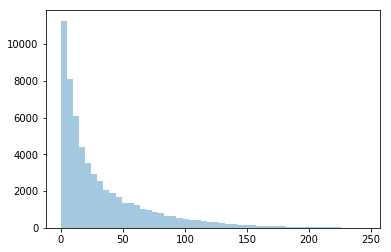

In [145]:
sns.distplot(x_range, kde=False)

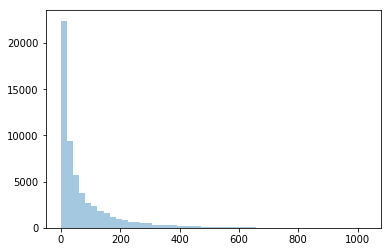

In [146]:
sns.distplot(z_range, kde=False)

In [163]:
sum([1 for i in x_range if i<28])

35473